In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
# Answer 1

df = pd.read_excel('/csv/flight_price.xlsx')
print(f"Dimesions of the dataset are -- {df.shape}")
print(f'No. of rows are -- {df.shape[0]}')
print(f'No. of cols are -- {df.shape[1]}')

Dimesions of the dataset are -- (10683, 11)
No. of rows are -- 10683
No. of cols are -- 11


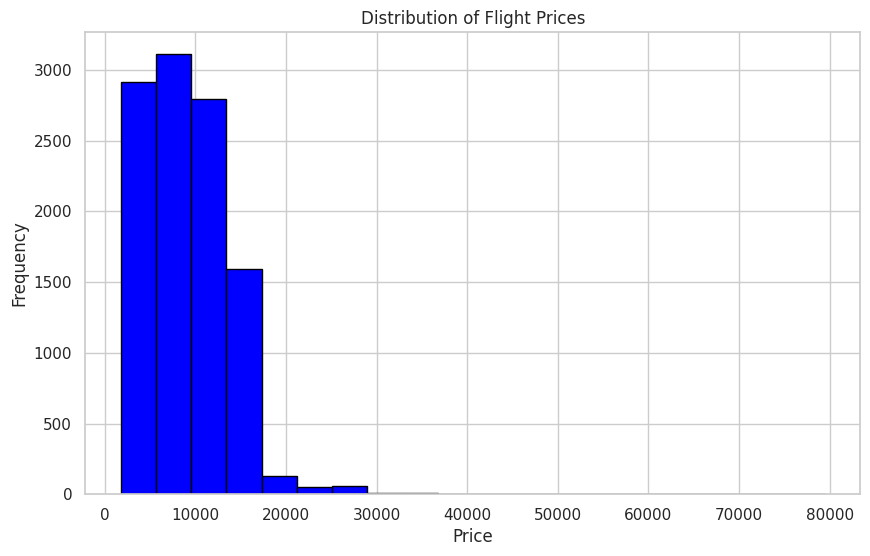

In [ ]:
# Answer 2

df['Price'] = df['Price'].fillna(df['Price'].median())

plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

In [ ]:
# Answer 3

price_range = df['Price'].max() - df['Price'].min()

min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"Price Range: {price_range}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Price Range: 77753
Minimum Price: 1759
Maximum Price: 79512


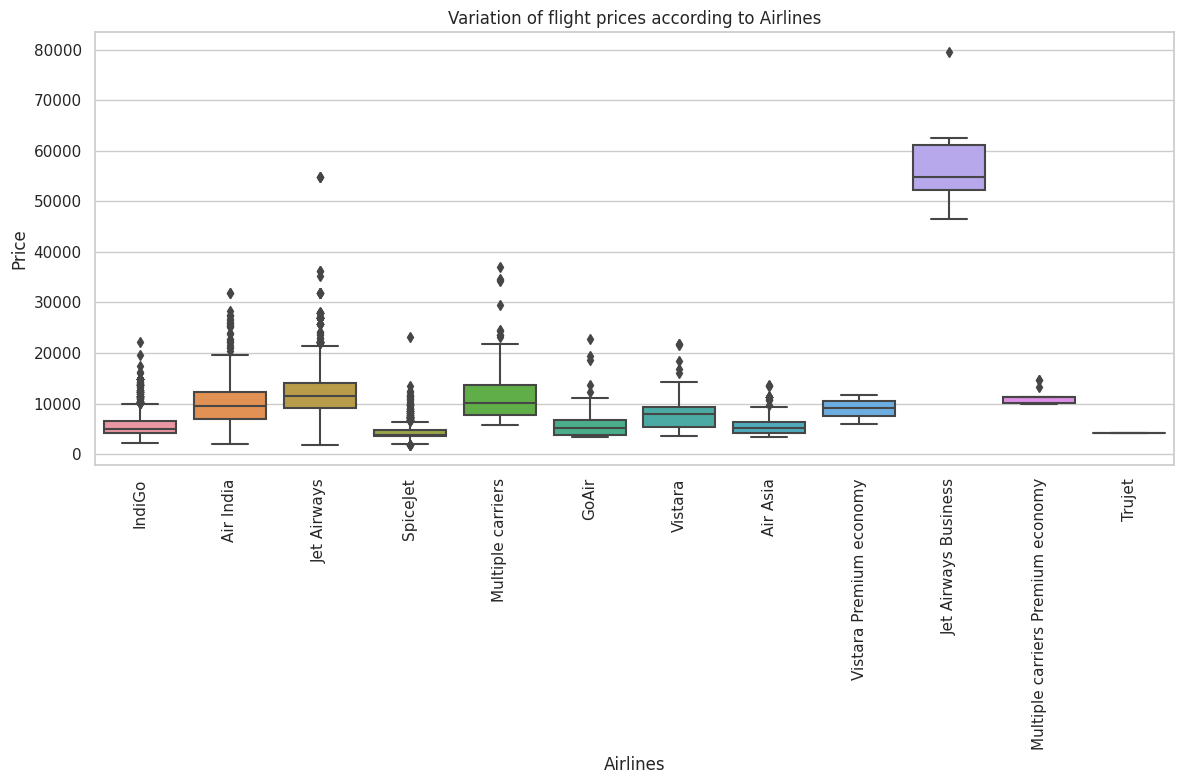

In [ ]:
# Answer 4

df['Airline'] = df['Airline'].fillna(df['Airline'].mode()[0])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Variation of flight prices according to Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.tight_layout()

Text(0.5, 0, 'Price')

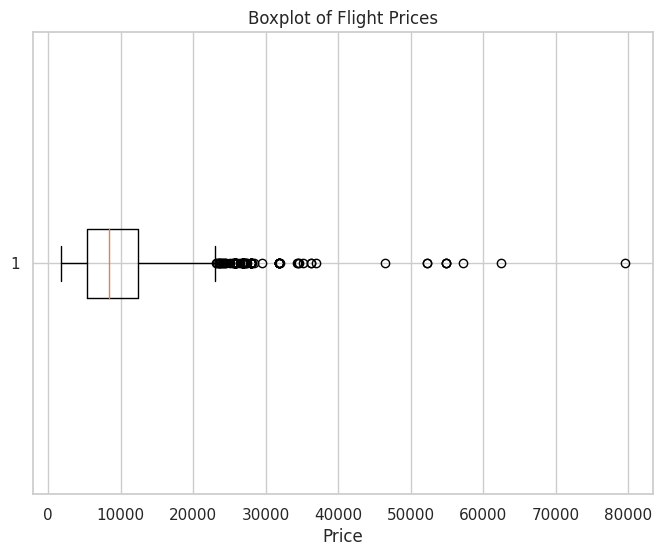

In [ ]:
# Answer 5

plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')

In [ ]:
# yes there are many outliers as can be seen in above box plot
# Outliers could indicate extreme values that deviate significantly from the majority of the data.
# Outliers can impact statistical analyses, such as mean and standard deviation calculations, and may skew results.

In [ ]:
# Answer 6

df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Date'] = df['Date'].astype(int)

df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Month'] = df['Month'].astype(int)

df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
df['Year'] = df['Year'].astype(int)

df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
# now we need to analyze Date and Month to identify peak trends and we can visualize it using count plot


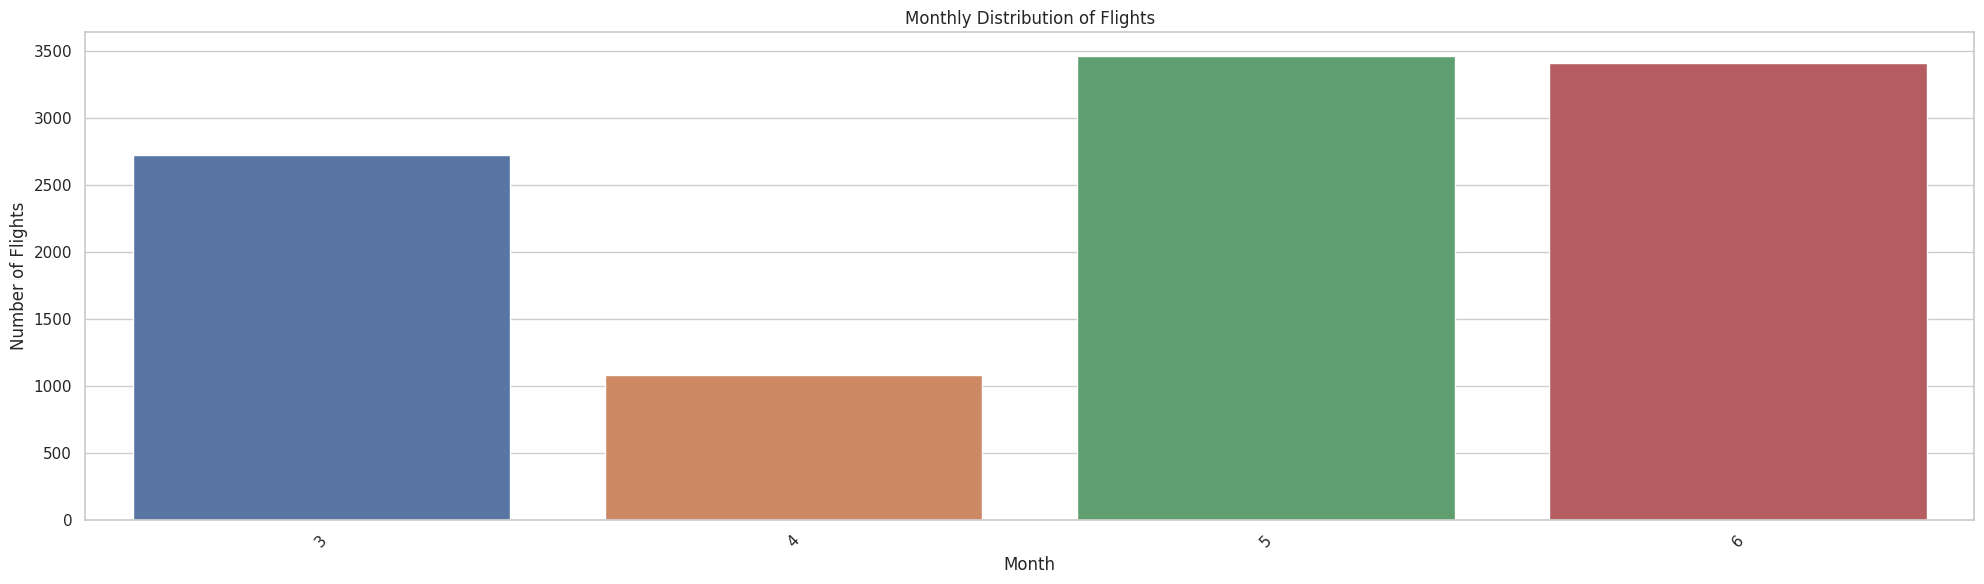

In [ ]:
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
sns.countplot(x="Month", data=df)

plt.title("Monthly Distribution of Flights")
plt.xlabel("Month")
plt.ylabel("Number of Flights")

plt.xticks(rotation=45)
plt.tight_layout()

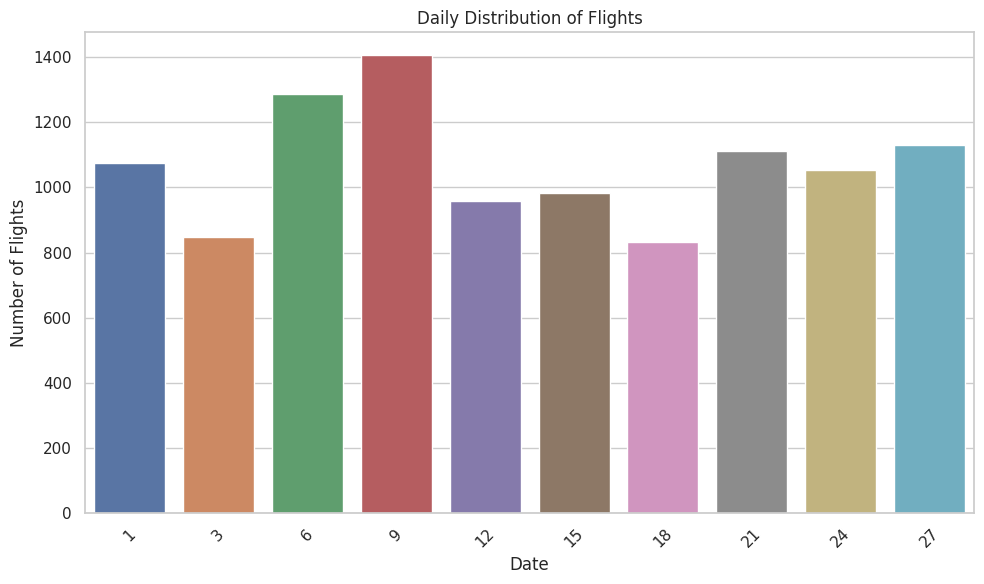

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x="Date", data=df)

plt.title("Daily Distribution of Flights")
plt.xlabel("Date")
plt.ylabel("Number of Flights")

plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# from above visualizations we can conclude that the peak travel season is Around 5th month (may) and around date 9

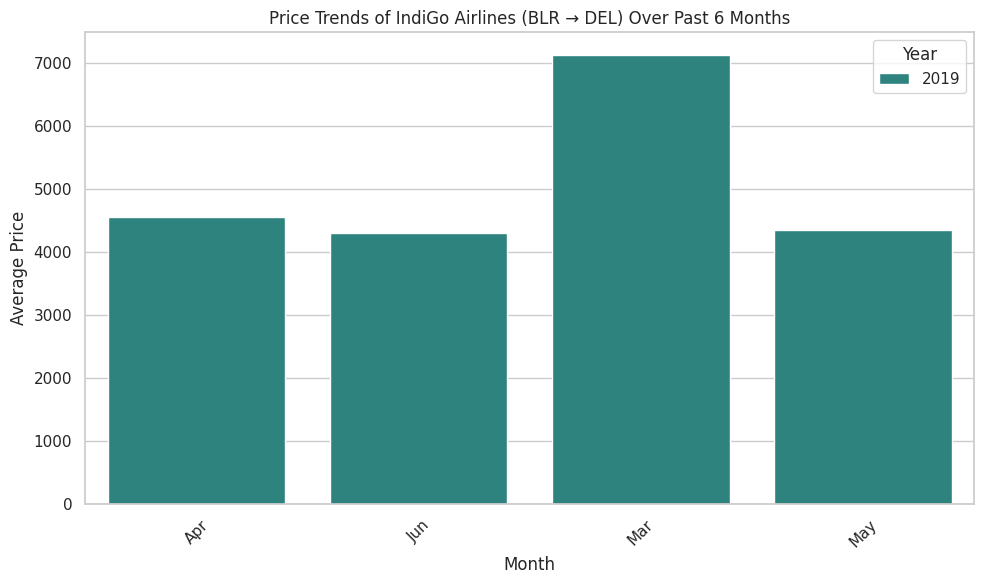

In [ ]:
# Answer 7

# we can analyze price trends against many features like month , year, Airlines, Route and we can use bar charts for the same
# for eg -- we can analyze price trends of Indigo airlines for the route BLR → DEL over past 6 months

indigo_flights = df[(df['Airline'] == 'IndiGo') & (df['Route'] == 'BLR → DEL')]

indigo_flights['Month'] = pd.to_datetime(indigo_flights['Month'], format='%m').dt.strftime('%b')
indigo_flights['Year'] = indigo_flights['Year'].astype(str)

average_prices_by_month = indigo_flights.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Price', hue='Year', data=average_prices_by_month, palette='viridis')
plt.title('Price Trends of IndiGo Airlines (BLR → DEL) Over Past 6 Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Year')

In [ ]:
# from above graphs we can see that indigo airline price for BLR->DEL route was the highest during March

In [ ]:
# Answer 8

# As a data scientist analyzing the Flight Price dataset to identify factors that affect flight prices, I would consider the following features for my analysis:

# Airline: Different airlines might have varying pricing strategies, services, and brand reputation that influence flight prices.

# Source and Destination: The origin and destination cities can impact flight prices due to factors like distance, demand, and airport fees.

# Total Stops: The number of stops in a flight can affect prices, with direct flights usually costing more than multi-stop flights.

# Departure and Arrival Times: Flight prices can vary based on the time of day, day of the week, and season due to demand patterns.

# Duration: Longer flights might have higher prices due to fuel and operational costs.

# Additional Info: This feature could include factors like flight class (economy, business, first class) and any special services provided, which could impact pricing.

# Date, Month, and Year: Seasonality and overall trends over time could play a role in flight prices.

# To analyze these factors and present the findings to the management team, I would follow these steps:

# Data Cleaning and Preprocessing: Clean the dataset, handle missing values, convert categorical variables to numerical, and ensure the data is ready for analysis.

# Exploratory Data Analysis (EDA):

# Conduct univariate analysis of each feature to understand its distribution.
# Create visualizations such as histograms, box plots, and bar charts to analyze the spread and patterns of features like airline, stops, departure times, etc.
# Explore relationships between features and the target variable (Price) using scatter plots, correlation matrices, and pivot tables.
# Feature Importance Analysis:

# Use techniques like feature importance from machine learning models (e.g., Random Forest, XGBoost) to identify which features have the most impact on flight prices.
# Statistical Analysis:

# Perform statistical tests (ANOVA, t-tests) to determine if there are significant price differences between categories within categorical features.
# Time Series Analysis (if applicable):

# Analyze trends in flight prices over time (months, years) to identify any seasonal patterns or long-term trends.
# Machine Learning Models:

# Develop predictive models to estimate flight prices based on the selected features. This can help quantify the impact of each feature on prices.
# Visualization and Presentation:

# Create informative visualizations such as heatmaps, bar charts, line plots, and regression plots to illustrate the relationships between factors and prices.
# Prepare a presentation summarizing the key findings, including insights about how different features influence flight prices.
# Use storytelling techniques to guide the management team through the analysis process and explain the implications of the findings.
# Recommendations:

# Provide actionable recommendations based on the analysis. For example, the company could adjust pricing strategies for different airlines, routes, and seasons.
# Interactive Dashboards (Optional):

# If resources permit, create interactive dashboards using tools like Tableau or Power BI. This allows stakeholders to explore the data and findings on their own.
# Ultimately, the goal is to provide the management team with a clear understanding of the factors influencing flight prices and actionable insights to make informed decisions about pricing strategies and customer offerings.

In [ ]:
# Let's consider a specific case where we want to analyze how flight prices are affected by the number of stops in the Flight Price dataset. We'll use a bar plot from Seaborn to visualize the average flight prices for different numbers of stops.

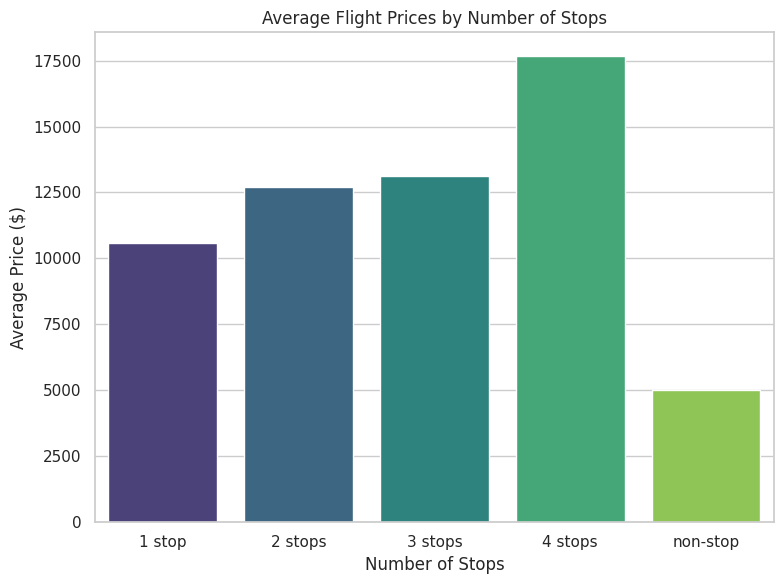

In [ ]:
subset_df = df[['Total_Stops', 'Price']]

average_prices_by_stops = subset_df.groupby('Total_Stops')['Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Total_Stops', y='Price', data=average_prices_by_stops, palette='viridis')
plt.title('Average Flight Prices by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price ($)')
plt.tight_layout()

In [ ]:
# Answer 9

df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print(f"Dimesions of the dataset are -- {df.shape}")
print(f'No. of rows are -- {df.shape[0]}')
print(f'No. of cols are -- {df.shape[1]}')

Dimesions of the dataset are -- (10841, 13)
No. of rows are -- 10841
No. of cols are -- 13


In [ ]:
# Answer 11

# yes, there are some missing values in the dataset
print(f"No. of missing values in each of the features -- \n\n{df.isnull().sum()}")

# some ways how missing values might impact our analysis:

# Statistical Analysis: Missing values can affect calculations of means, medians, and other statistical measures. If the column with missing values is used in calculations, it might lead to biased or inaccurate results.

# Visualization: Missing values can affect the visualization of data. For instance, if you're creating a boxplot to compare app ratings by category (as in your previous question), missing ratings might distort the distribution of ratings for certain categories.

# Machine Learning: If you plan to use machine learning algorithms, many of them cannot handle missing values. You might need to impute or fill in missing values using appropriate methods.

# Category Analysis: If the missing values are in the 'Category' column, it might become challenging to perform category-wise analysis as intended.


No. of missing values in each of the features -- 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


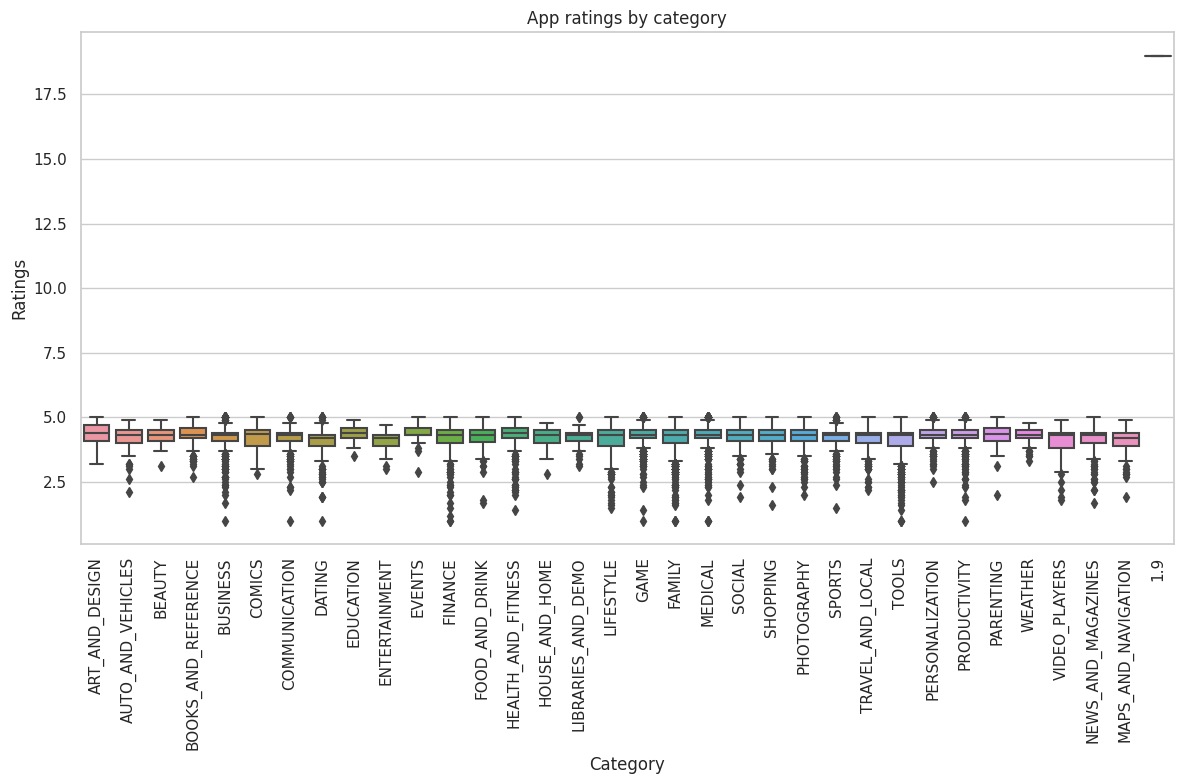

In [ ]:
# Answer 10

df['Rating'] = df['Rating'].fillna(df['Rating'].median())

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('App ratings by category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.tight_layout()

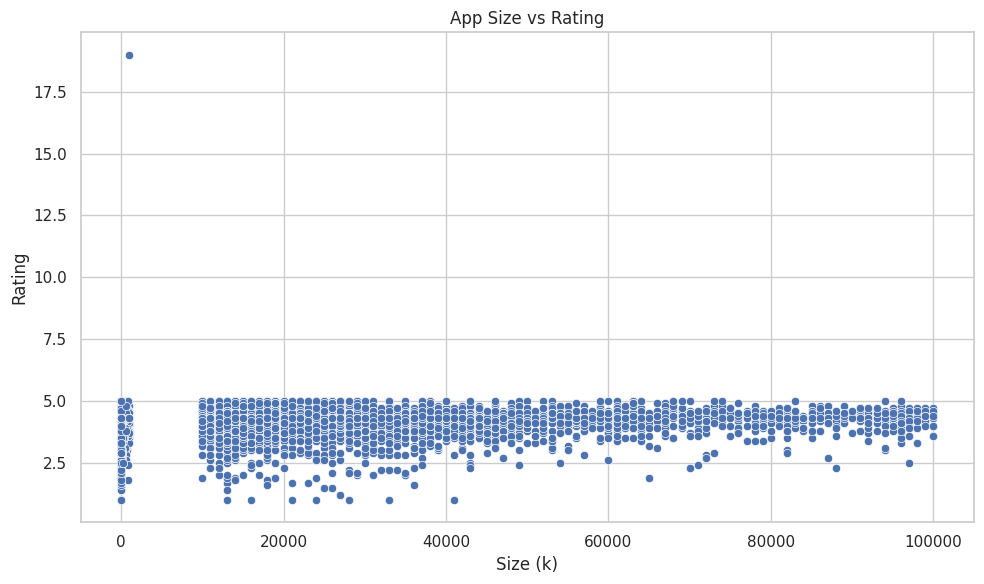

In [ ]:
# Answer 12

# Preprocess the 'Size' column
df['Size'] = df['Size'].str.replace('M', '000')  # Convert 'M' to million
df['Size'] = df['Size'].str.replace('k', '')  # Convert 'k' to thousand
df['Size'] = df['Size'].str.replace(',', '')    # Remove commas
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].astype(float)
df['Size'] = df['Size'].fillna(df['Size'].median())

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('App Size vs Rating')
plt.xlabel('Size (k)')
plt.ylabel('Rating')
plt.tight_layout()

In [ ]:
# Answer 13

# there are 2 app types -- free and paid

items_to_remove = ['$', ',']

for item in items_to_remove:
    df['Price'] = df['Price'].str.replace(item, '')

df['Price'] = df['Price'].replace('Everyone', np.nan)
df['Price'] = df['Price'].fillna(df['Price'].median())

df['Type'] = df['Type'].replace('0', np.nan)
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

df['Price'] = df['Price'].astype(float)

In [ ]:
average_prices_by_type = df.groupby('Type')['Price'].mean().reset_index()

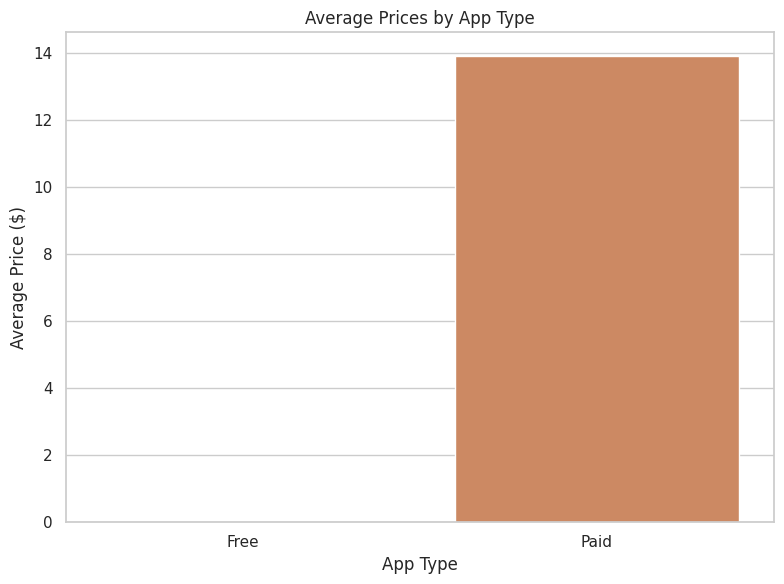

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Price', data=average_prices_by_type)
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.tight_layout()

In [ ]:
# Answer 14

df['Installs'] = df['Installs'].str.replace(',' , '')
df['Installs'] = df['Installs'].str.replace('+' , '')
df['Installs'] = df['Installs'].replace('Free' , np.nan)
df['Installs'] = df['Installs'].fillna(df['Installs'].median())

In [ ]:
df['Installs'] = df['Installs'].astype(int)
# df = df.drop_duplicates(subset=['App'], keep='first')

app_install_counts = df.groupby('App')['Installs'].sum().reset_index()

top_10_apps = app_install_counts.sort_values(by='Installs', ascending=False).head(10)

print(top_10_apps)

                                           App    Installs
8080                            Subway Surfers  6000000000
4937                             Google Photos  4000000000
5399                                 Instagram  4000000000
5118                                  Hangouts  4000000000
4933                               Google News  4000000000
4924                              Google Drive  4000000000
2364                          Candy Crush Saga  3500000000
6166  Messenger – Text and Video Chat for Free  3000000000
9042                        WhatsApp Messenger  3000000000
4869                                     Gmail  3000000000


Text(0.5, 1.0, 'Most Popular Categories in Play Store (Top 10)')

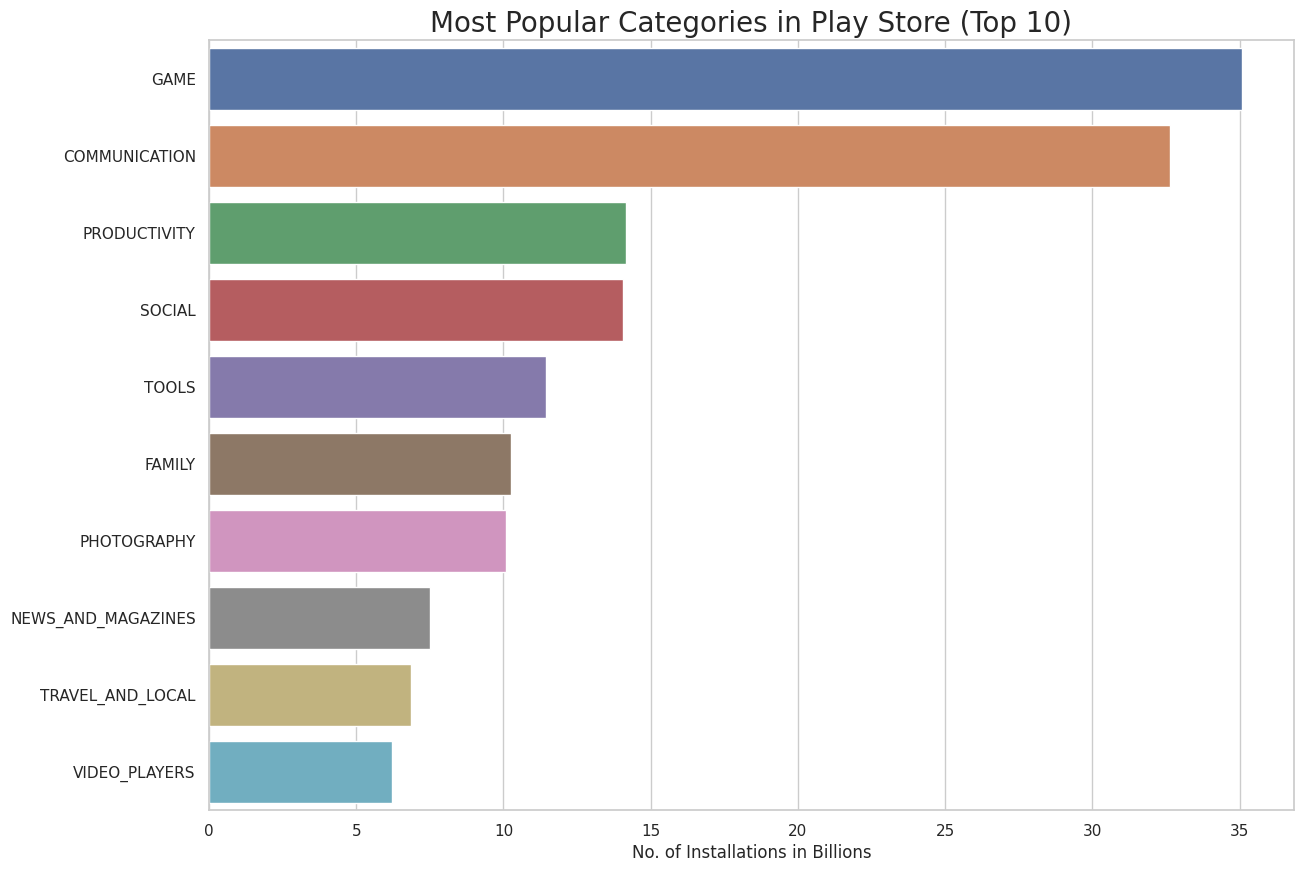

In [ ]:
# Answer 15

# we will analyze category and installs features to analyze the top 10 most popular app categories --

df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store (Top 10)", size = 20)

Text(0, 0.5, 'Type')

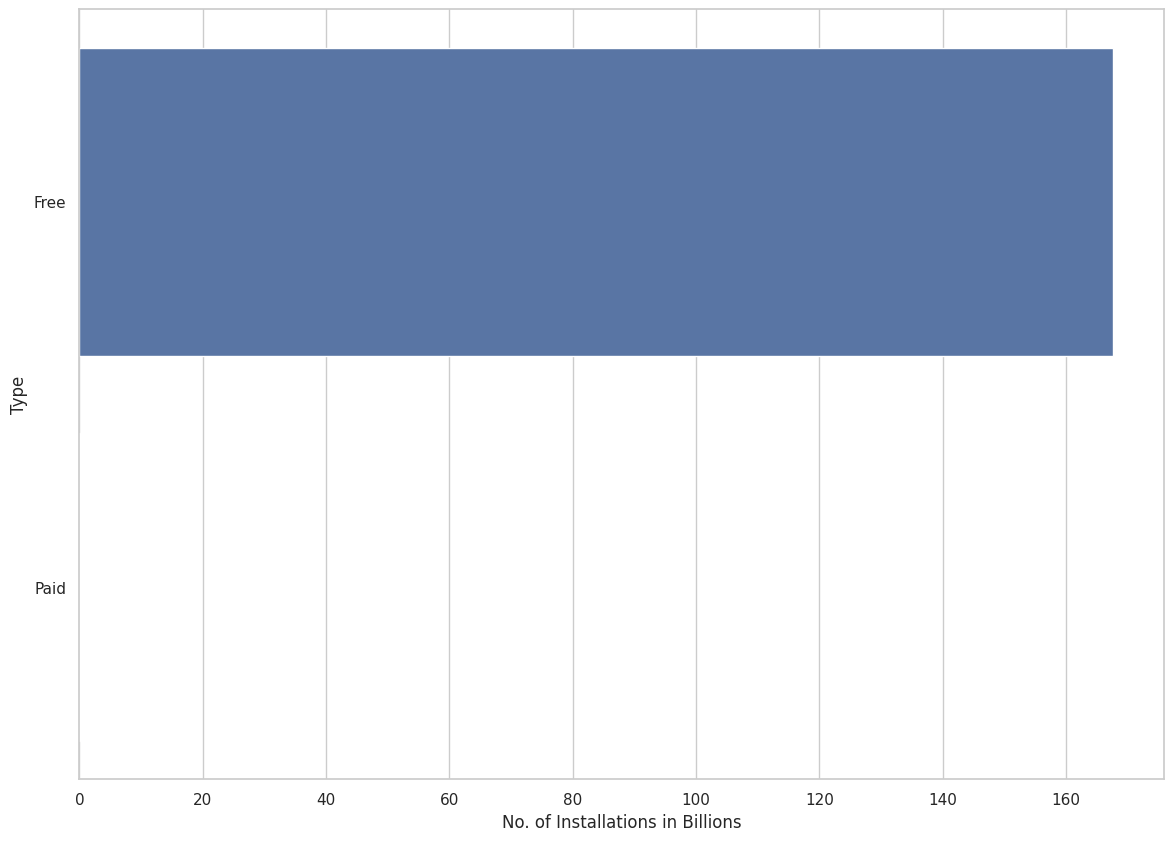

In [ ]:
# Answer 16

# we will use Type, Categories, Genres, Content rating and size features to determine which app developers are the most successful ones.
# we will plot bar graphs for each of the above feaatures with no. of installs to see what type is installed the most

df_type_installs = df.groupby(['Type'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_type_installs.Installs = df_type_installs.Installs/1000000000# converting into billions
df2 = df_type_installs
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Type' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Type')

Text(0, 0.5, 'Category')

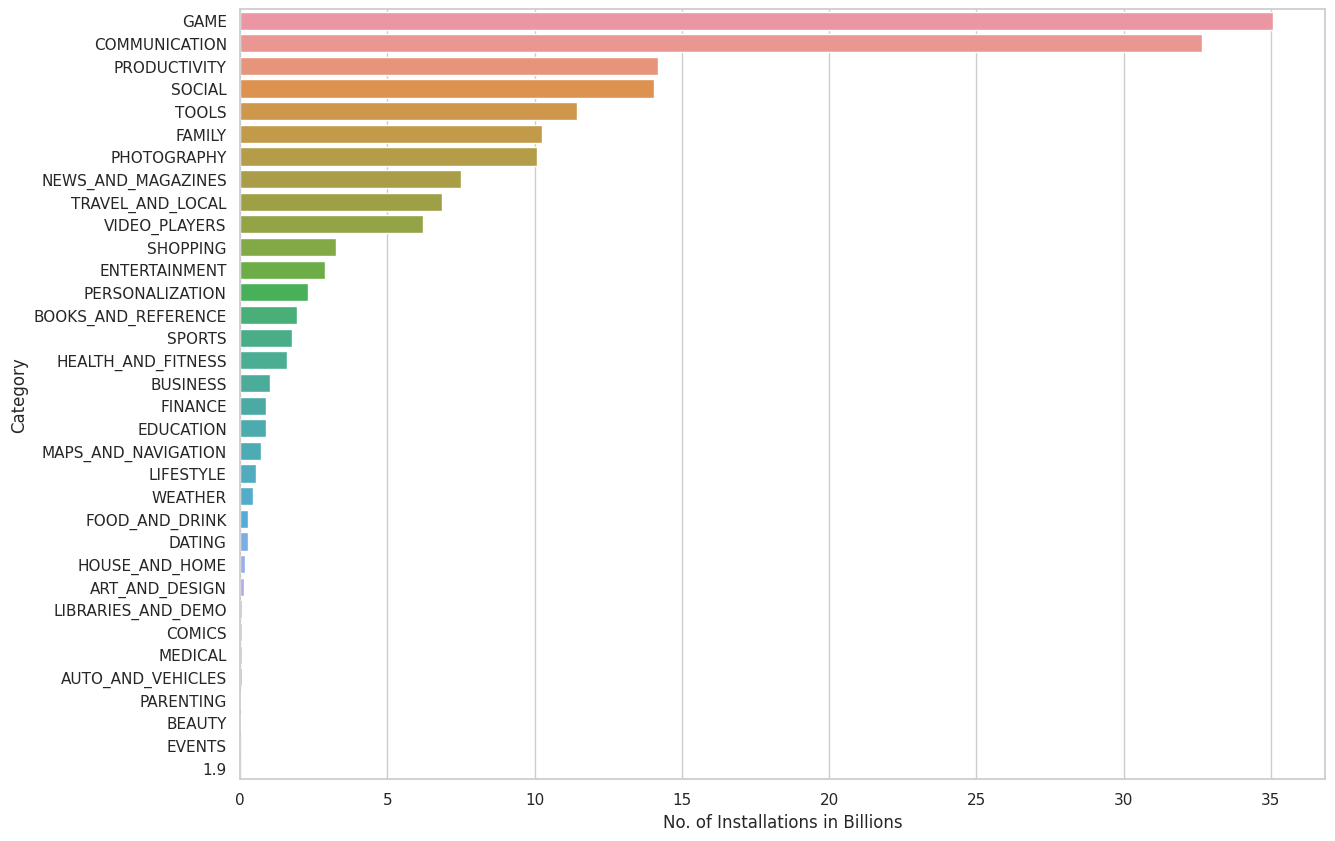

In [ ]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Category')

Text(0, 0.5, 'Genre')

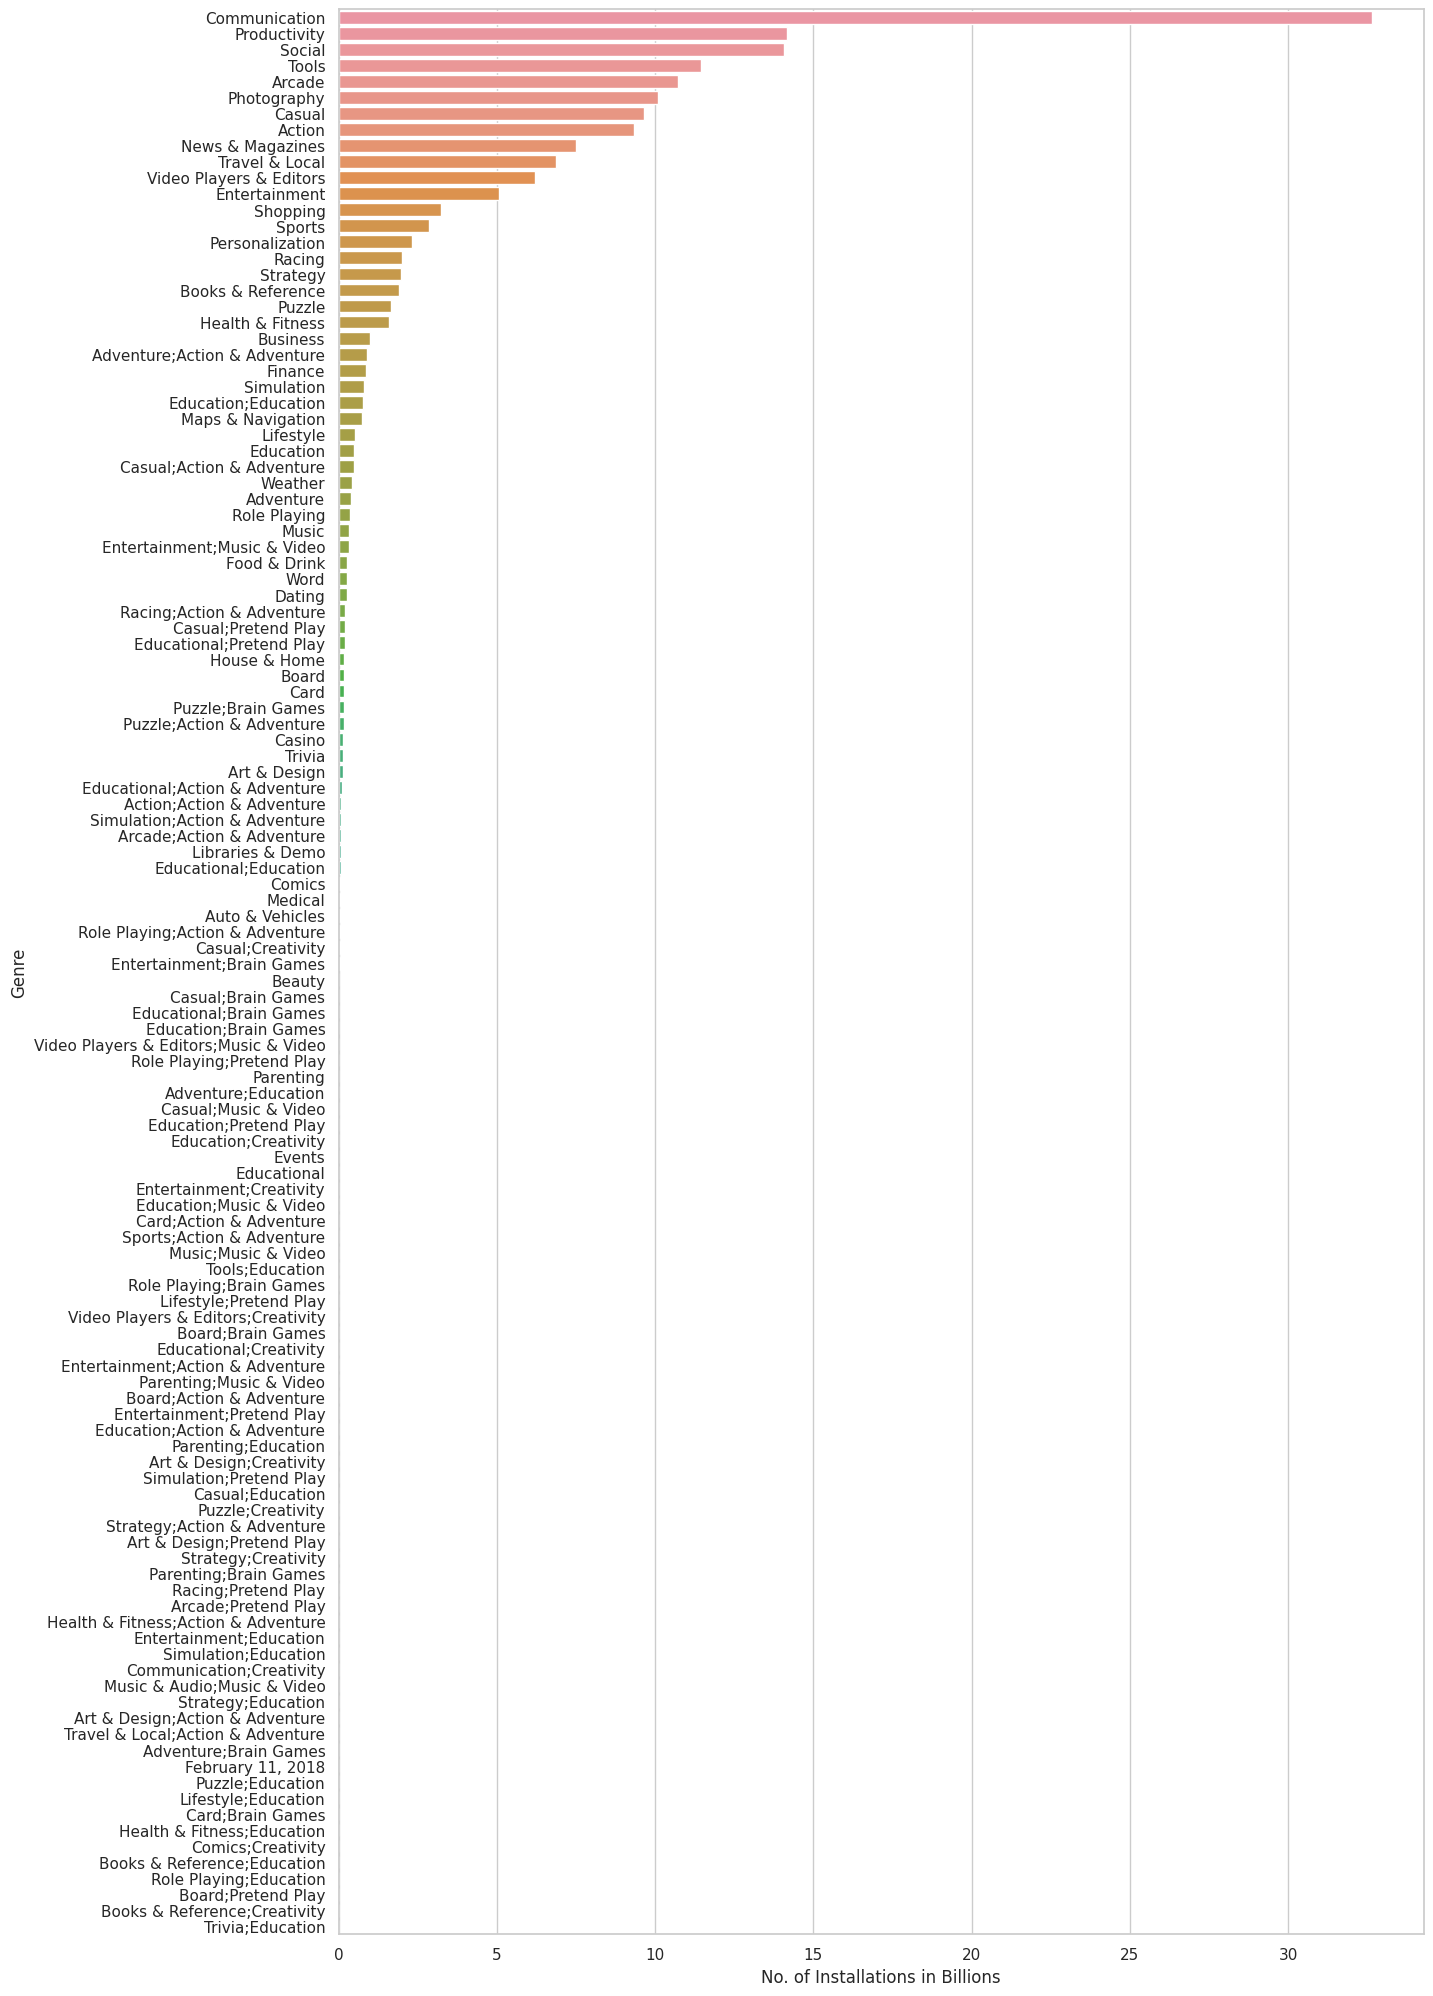

In [ ]:
df_genre_installs = df.groupby(['Genres'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_genre_installs.Installs = df_genre_installs.Installs/1000000000# converting into billions
df2 = df_genre_installs
plt.figure(figsize = (14,25))
ax = sns.barplot(x = 'Installs' , y = 'Genres' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Genre')

Text(0, 0.5, 'Content Rating')

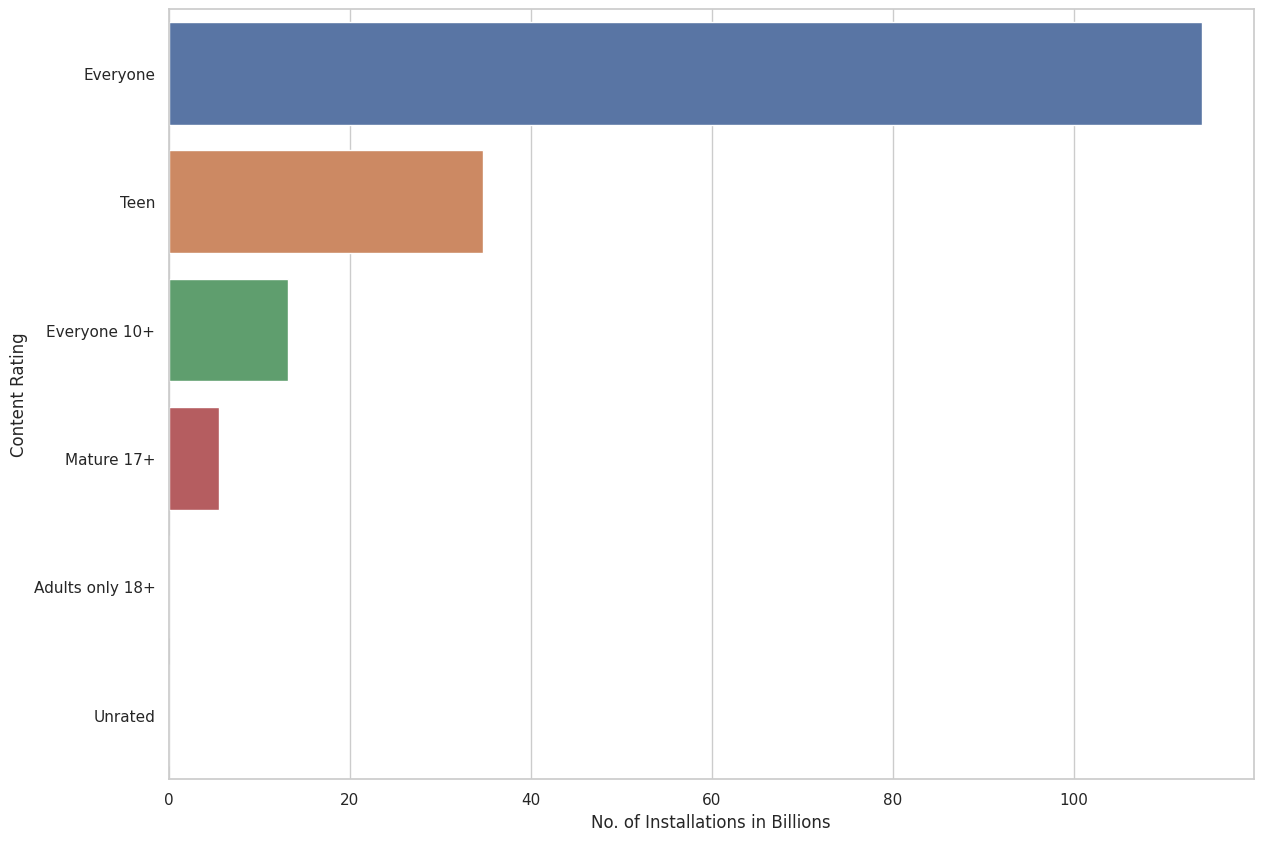

In [ ]:
df_cr_installs = df.groupby(['Content Rating'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cr_installs.Installs = df_cr_installs.Installs/1000000000# converting into billions
df2 = df_cr_installs
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Content Rating' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Content Rating')

Text(0, 0.5, 'Size')

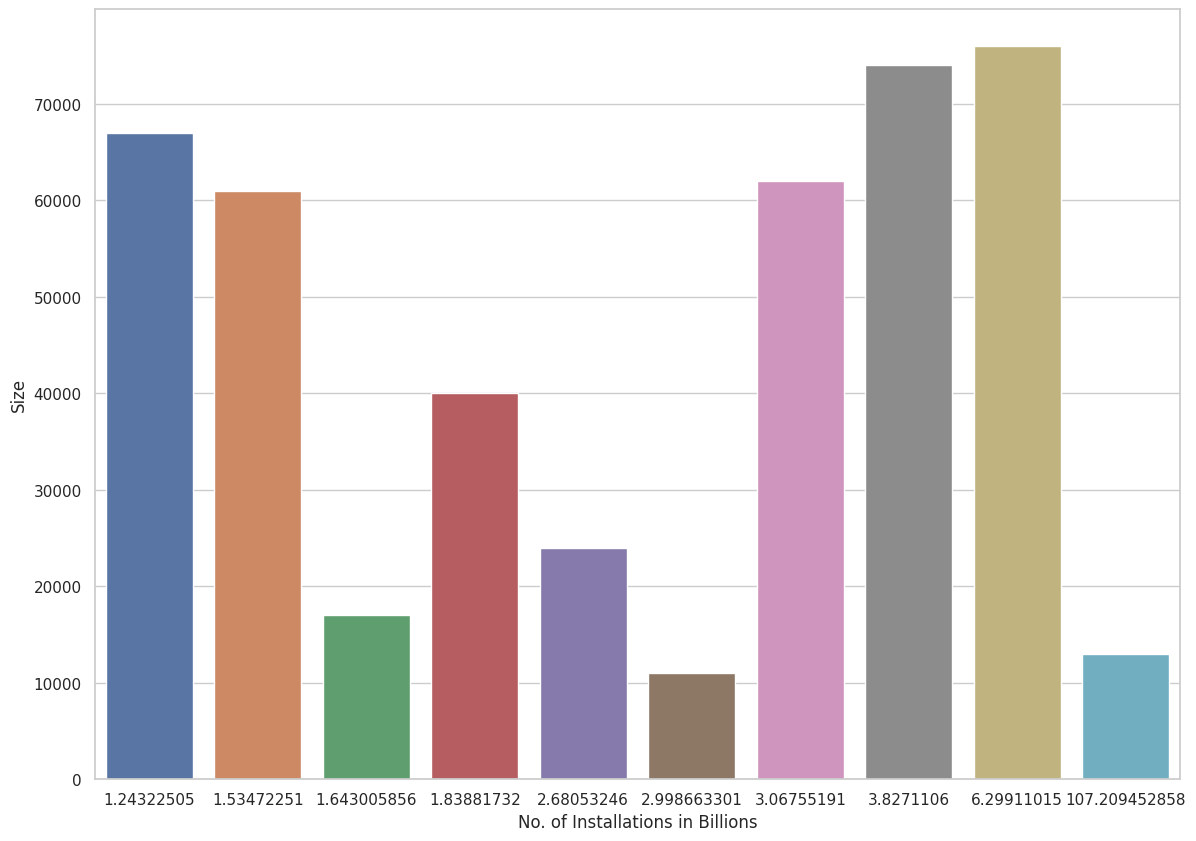

In [ ]:
df_size_installs = df.groupby(['Size'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_size_installs.Installs = df_size_installs.Installs/1000000000# converting into billions
df2 = df_size_installs.head(10)
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Size' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Size')

In [ ]:
# from above graphs we can conclude that most successful app developers are those who makes free apps, apps in game category, apps with communication as the genre, apps with content rating as Everyone , and apps with less than 70000 size

Text(0, 0.5, 'Day')

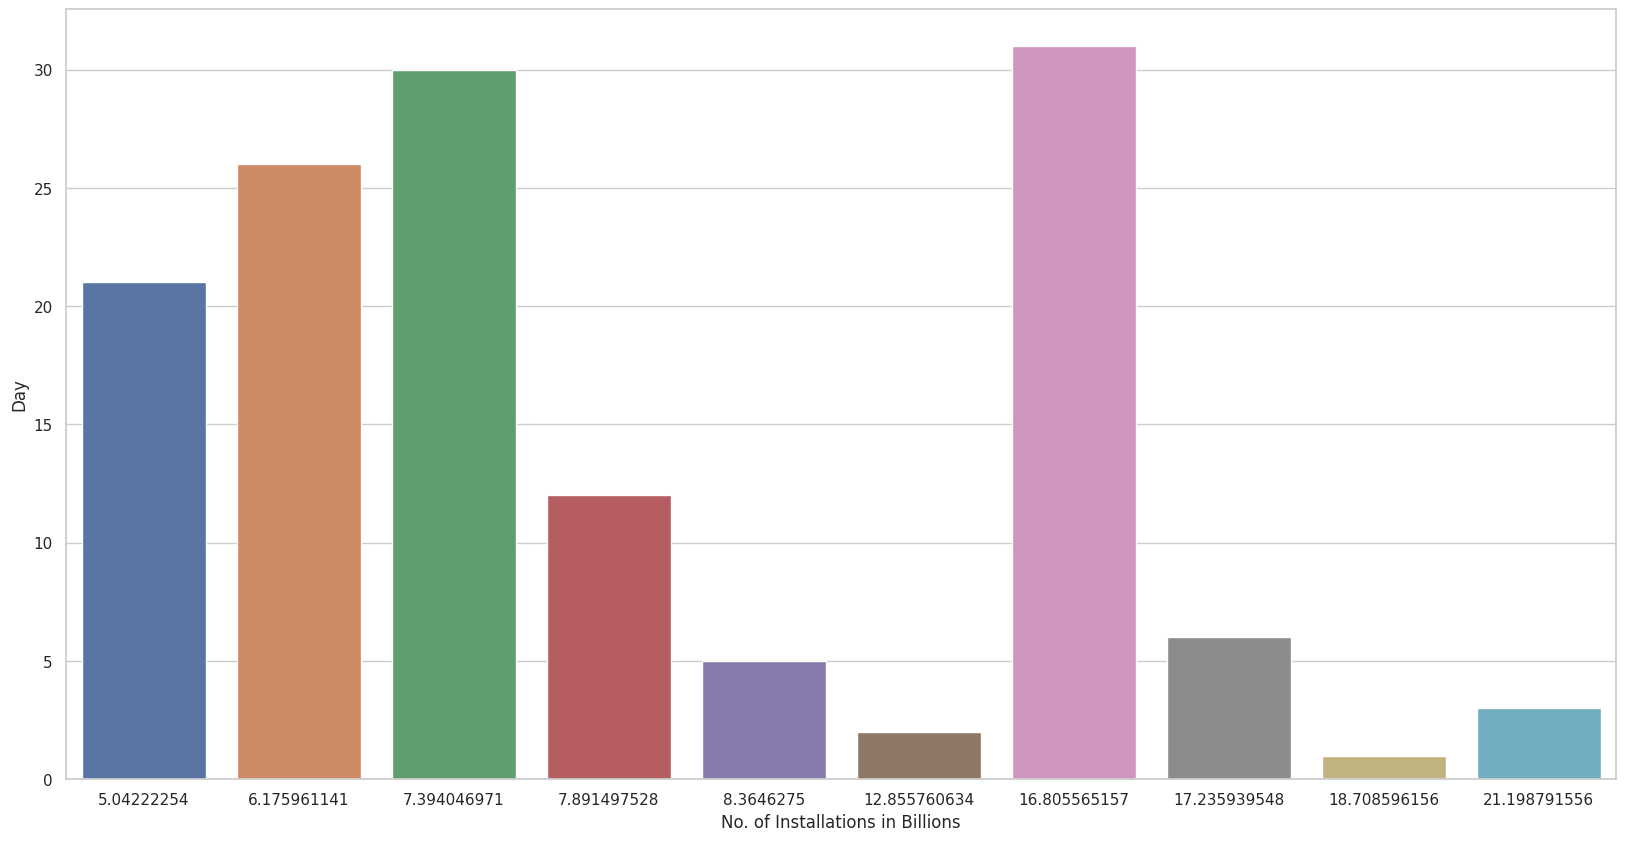

In [ ]:
# Answer 17

df.drop(df.index[10472], inplace=True)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

# now we will use Day and Month features to analyze that which time is best to launch an app for it to be most successful
# we will use barplots to visualize these features against no. of installs to see which time is best suitable to launch an app

df_day_installs = df.groupby(['Day'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_day_installs.Installs = df_day_installs.Installs/1000000000# converting into billions
df2 = df_day_installs.head(10)
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'Installs' , y = 'Day' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Day')

Text(0, 0.5, 'Month')

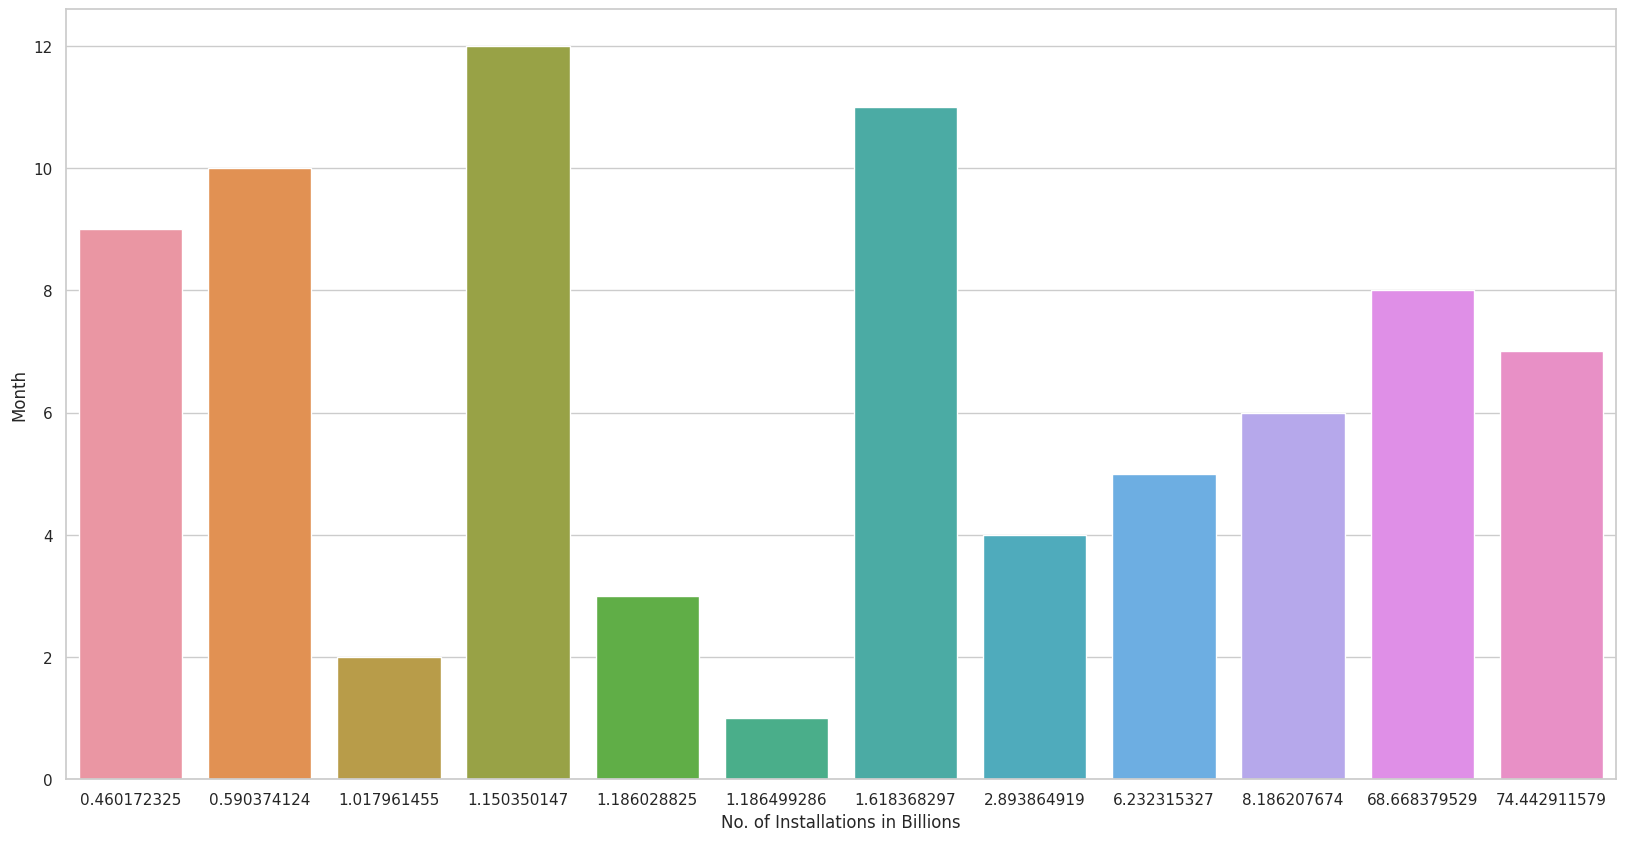

In [ ]:
df_month_installs = df.groupby(['Month'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_month_installs.Installs = df_month_installs.Installs/1000000000# converting into billions
df2 = df_month_installs
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'Installs' , y = 'Month' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('Month')

In [ ]:
# from above graphs, we can conclude that the best time to launch an app is the mid of the year and in the starting days of the month